In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read sample23.dat file and extract its content as a numpy array of floats
data = np.loadtxt('sample23.dat')

## Ejercicio 1
Estudiar la independencia estadística de los datos de la muestra.  
A tal fin construir el ”diagrama de dispersón”, esto es, el gráfico de los pares ($X_i, X_i+1)$ con $i = 1, . . . , n − 1$, donde n es el número de datos de la muestra. Interpretar el diagrama obtenido.

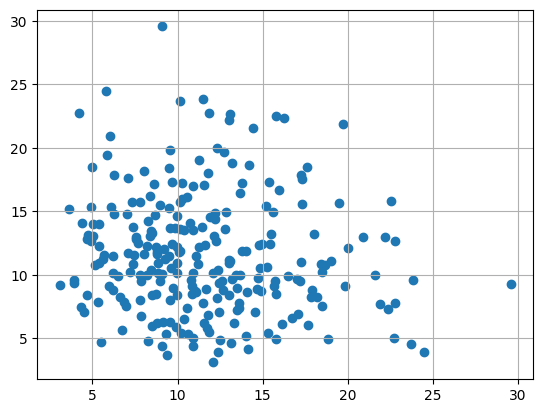

In [3]:
fig, ax = plt.subplots()
x = data[:-1]
y = data[1:]
ax.scatter(x, y)
ax.grid(True)
plt.show()

## Ejercicio 2
Elaboración de la hipótesis sobre la familia de distribuciones a la que pertenece la muestra. 
A tal fin realizar:  
&emsp; **a)** Las estimaciones muestrales de: Valores máximos y mínimos, media, varianza y “skewness” (medida de la asimetría de la distribución).  
&emsp; **b)** La confección de un histograma con los datos muestrales.  
&emsp; **c)** El estudio de cuantiles en la muestra y confeccionar el correspondiente “box plot”.

In [4]:
# Tamaño muestral
n = len(data)
print(f'Tamaño muestral: {n}\n')

# Máximo muestral
M = max(data)
print(f'Máximo muestral: {M}\n')

# Mínimo muestral
m = min(data)
print(f'Mínimo muestral: {m}\n')

# Media muestral
Media = sum(data)/len(data)
print(f'Media muestral: {Media}\n')

# Varianza muestral
Scuad = 0
for i in range(n):
    Scuad += (data[i] - Media)
Scuad /= (n - 1)
print(f'Varianza muestral: {Scuad}\n')

# Skewness
Skew = 0
for i in range(n):
    Skew += (data[i] - Media)**3
Skew /= n
Skew /= Scuad**(3/2)
print(f'Asimetría muestral: {Skew}')

Tamaño muestral: 250

Máximo muestral: 29.567547

Mínimo muestral: 3.092925

Media muestral: 11.601359179999998

Varianza muestral: 2.3506408778408937e-15

Asimetría muestral: 6.598078760517416e+23


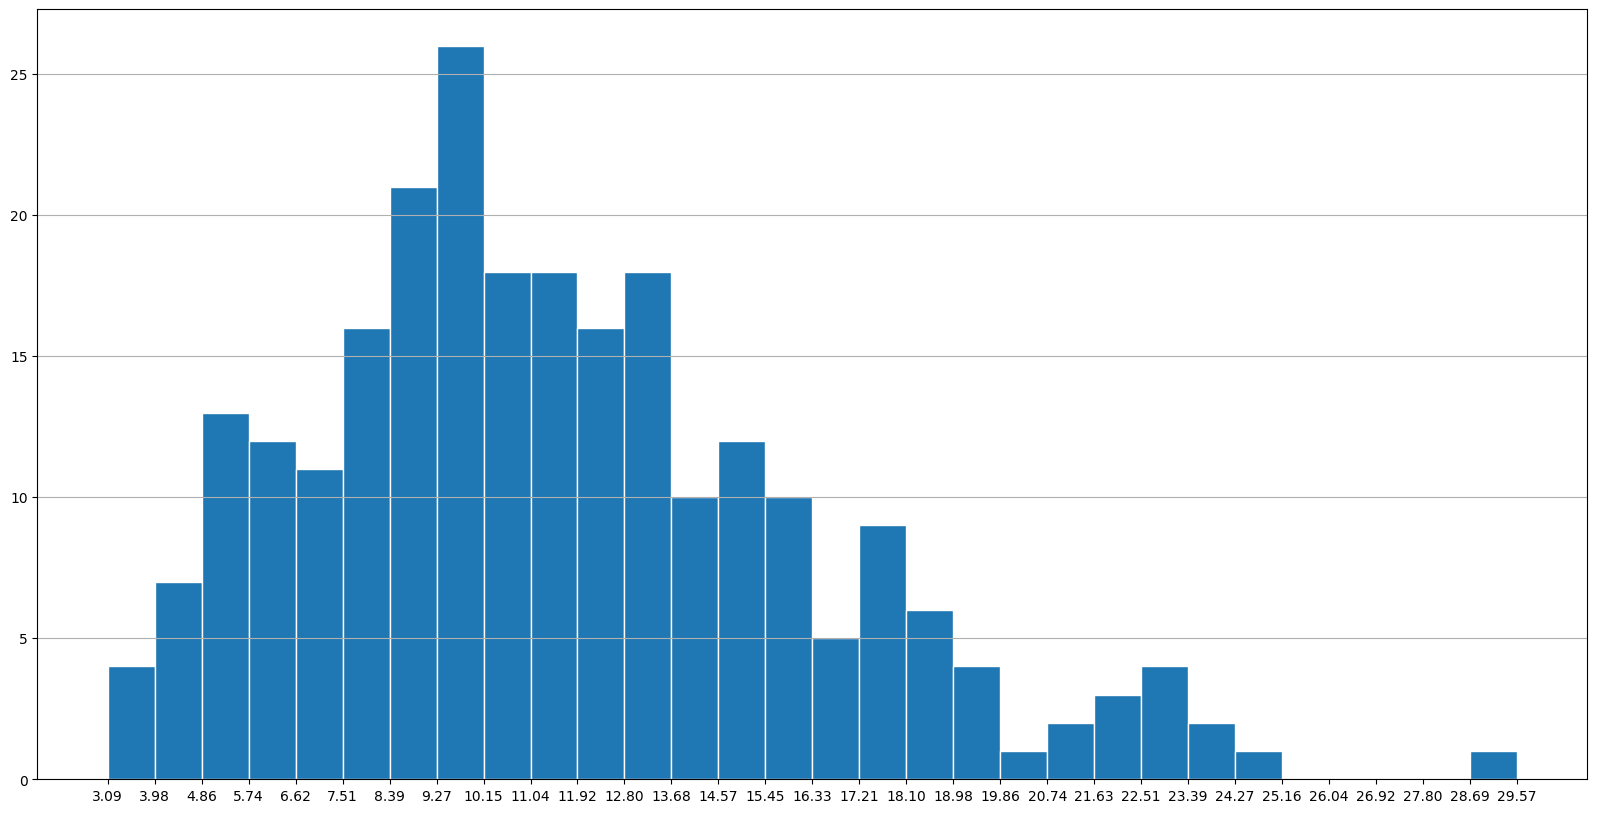

In [16]:
fig, ax = plt.subplots(figsize=[20,10])
n, bins, patches = ax.hist(data, bins=30, edgecolor="white")
ax.grid(axis='y')
plt.xticks(bins)
plt.show()

In [ ]:
fig, ax = plt.subplot